## Internship project

## Table of Contents :


1. Introduction
2. Getting the system ready and loading the dataset
3. Exploring the data
4. Exploratory Data Analysis (EDA)
 *  Univariate Analysis

  * Bivariate Analysis
5. Missing value and outlier treatment
6. Model Building and training


### Introduction

Loans are the core business of banks. The main profit comes directly from the loan’s interest. The loan companies grant a loan after an intensive process of verification and validation. However, they still don’t have assurance if the applicant is able to repay the loan with no difficulties.

we’ll build a predictive model to predict if an applicant is able to repay the lending company or not


###  Libraries 📕📗📘

In [75]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings # warning filter
import re

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statistics import mean, stdev
import joblib

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.metrics import confusion_matrix



### File Paths 📂

In [76]:
! git clone https://github.com/naoufal2807/Loan_prediction_project


fatal: destination path 'Loan_prediction_project' already exists and is not an empty directory.


In [77]:
!ls Loan_prediction_project

README.md  requirements.txt  test_data.csv  train_data.csv


In [78]:
#list all files under the input directory
data_path = []
for dirname, _, filenames in os.walk('Loan_prediction_project'):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        match = re.search(r'_data',filename)
        if match:
            data_path.append(file_path)
print(data_path)

['Loan_prediction_project/train_data.csv', 'Loan_prediction_project/test_data.csv']


In [79]:
#path for the training set
tr_path = data_path[0]
#path for the testing set
te_path = data_path[1]

### Exploring the  Dataset

This dataset is named [Loan_Dataset]. The dataset contains a set of **614** records under **13** attributes:

In [80]:
train_df=pd.read_csv(tr_path)
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [81]:
test_df=pd.read_csv(te_path)
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [82]:
print(train_df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


We have 12 independent variables and 1 target variable, i.e. Loan_Status in the train dataset.

In [83]:
print(pd.DataFrame(train_df.columns))

                    0
0             Loan_ID
1              Gender
2             Married
3          Dependents
4           Education
5       Self_Employed
6     ApplicantIncome
7   CoapplicantIncome
8          LoanAmount
9    Loan_Amount_Term
10     Credit_History
11      Property_Area
12        Loan_Status


We have similar features in the test dataset as the train dataset except the Loan_Status. We will predict the Loan_Status using the model built using the train data.

###  Size of each data set:

In [84]:
print(f"training set (row, col): {train_df.shape}\n\ntesting set (row, col): {test_df.shape}")

training set (row, col): (614, 13)

testing set (row, col): (367, 12)


### Preprocessing of the training dataset

In [85]:
#column information
train_df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [86]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [87]:
# summary statistic for dataset
train_df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [88]:
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


### Exploratory Data Analysis (EDA)

### univariate Analysis

<Axes: xlabel='Loan_Status'>

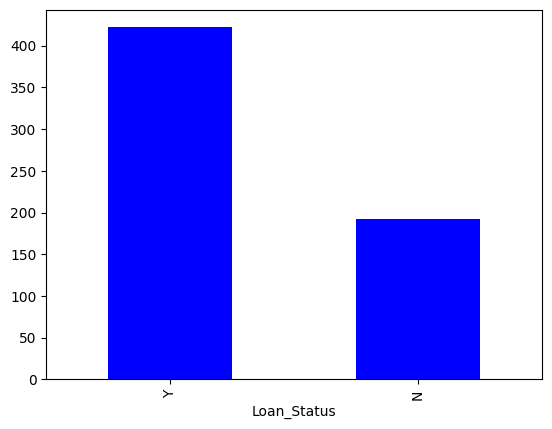

In [89]:
train_df['Loan_Status'].value_counts().plot.bar(color='blue')

In [90]:
train_df['Loan_Status'].value_counts(normalize=True)

,proportion
Loan_Status,
Y,0.687296
N,0.312704


In [91]:
train_df['Loan_Status'].value_counts(normalize=True)

,proportion
Loan_Status,
Y,0.687296
N,0.312704


<Axes: xlabel='Loan_Status'>

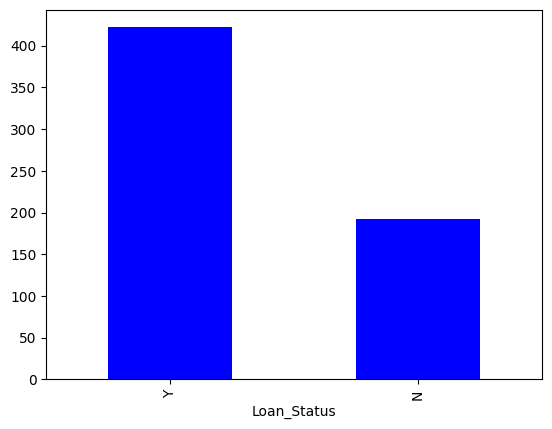

In [92]:
train_df['Loan_Status'].value_counts().plot.bar(color='blue')

The loan of 422(around 69%) people out of 614 were approved.

Now, let's visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

* Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
* Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
* Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount,Loan_Amount_Term)

### Categorical variables

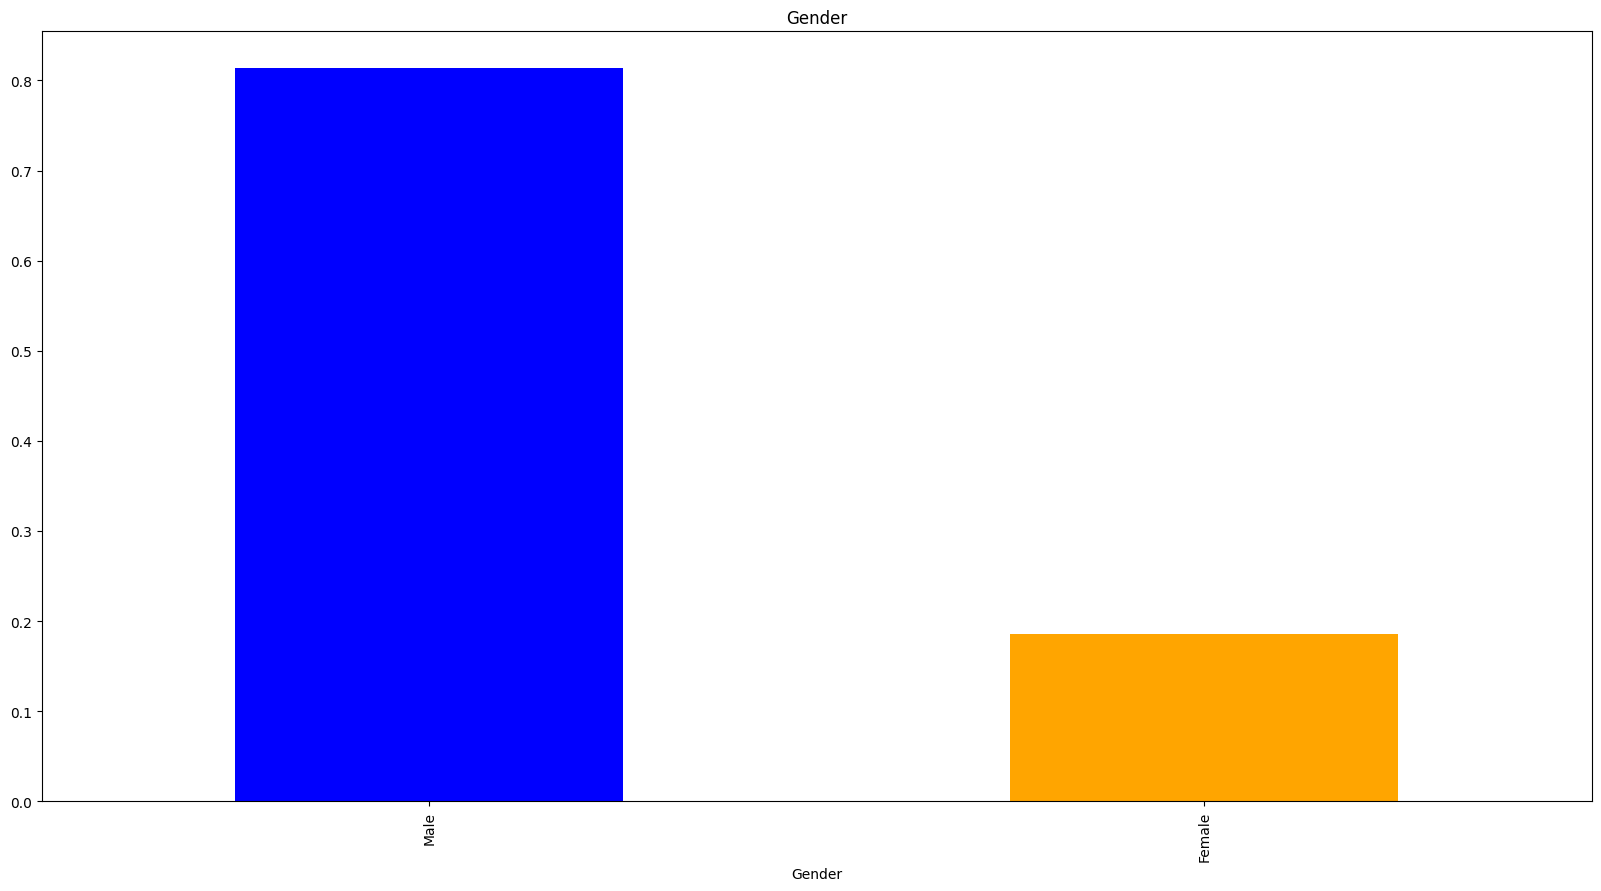

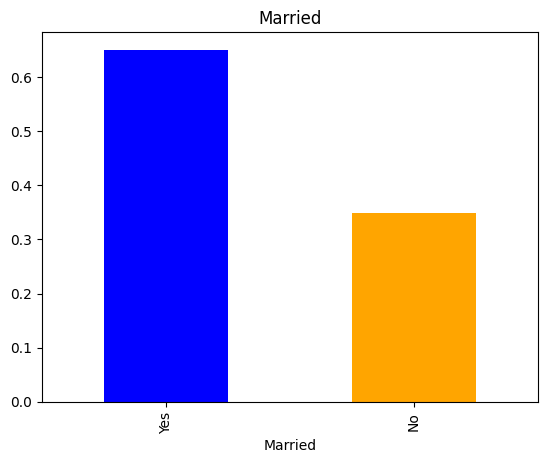

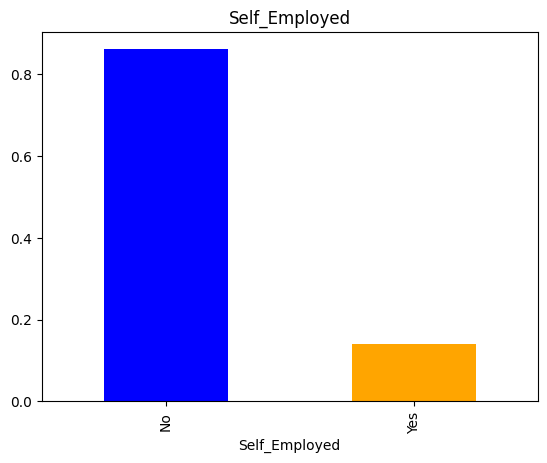

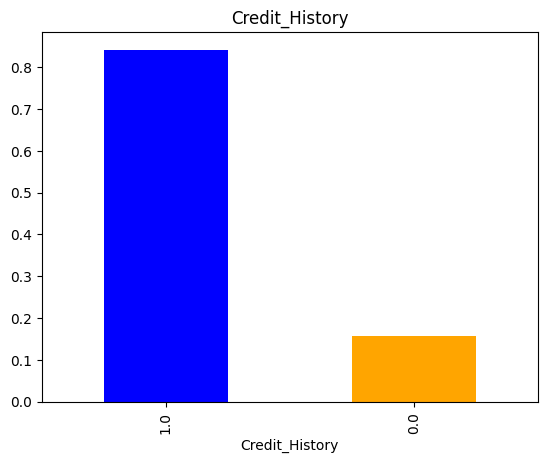

In [93]:
colors = ['blue', 'orange']
train_df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender',color=colors)
plt.show()
train_df['Married'].value_counts(normalize=True).plot.bar(title='Married',color=colors)
plt.show()
train_df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed',color=colors)
plt.show()
train_df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History',color=colors)
plt.show()

It can be inferred from the above bar plots that:

* 80% applicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* Around 15% applicants in the dataset are self employed.
* Around 85% applicants have repaid their doubts.

### Ordinal variables

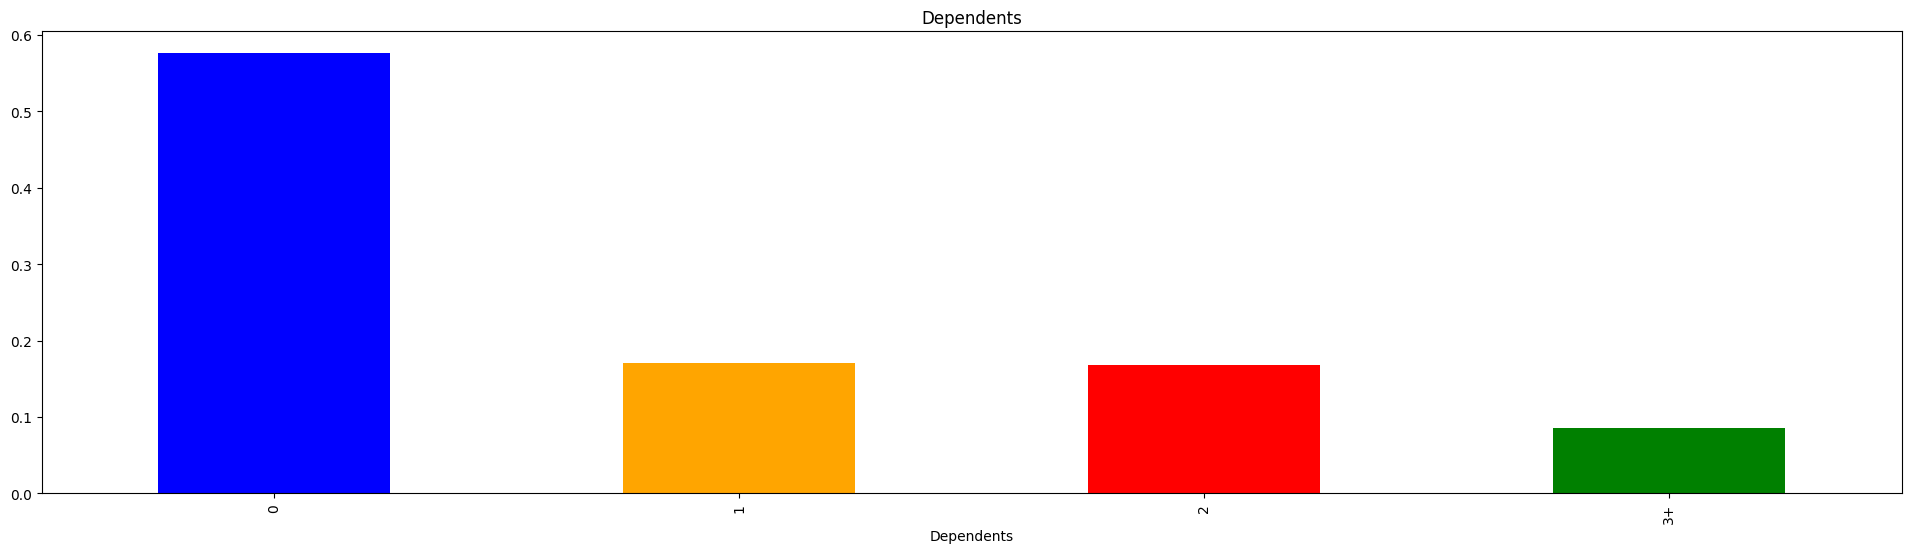

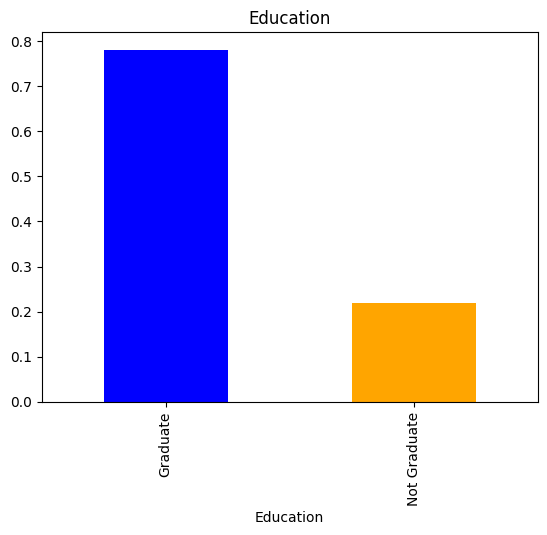

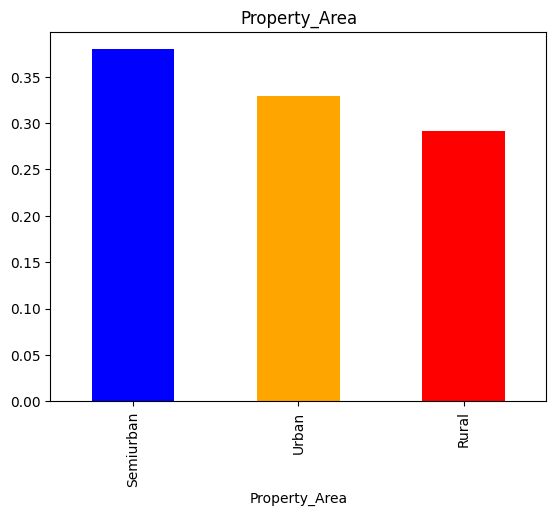

In [94]:
colors=['blue', 'orange','red','green']
train_df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents', color=colors)
plt.show()
train_df['Education'].value_counts(normalize=True).plot.bar(title='Education', color=colors)
plt.show()
train_df['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area', color=colors)
plt.show()

Following inferences can be made from the above bar plots:

* Most of the applicants don't have any dependents.
* Around 80% of the applicants are Graduate.
* Most of the applicants are from Semiurban area.

### Numerical variables

<ipython-input-95-55f189229c23>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['ApplicantIncome'])


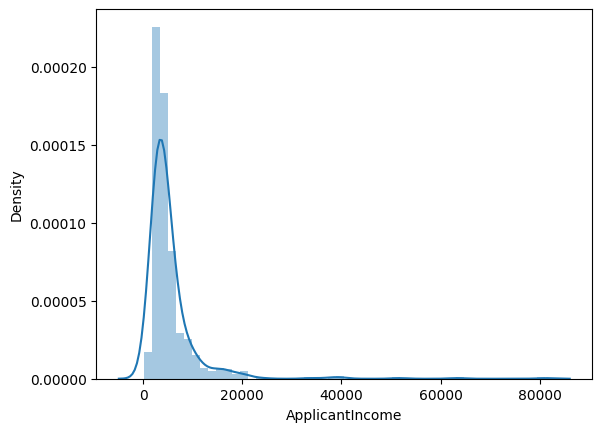

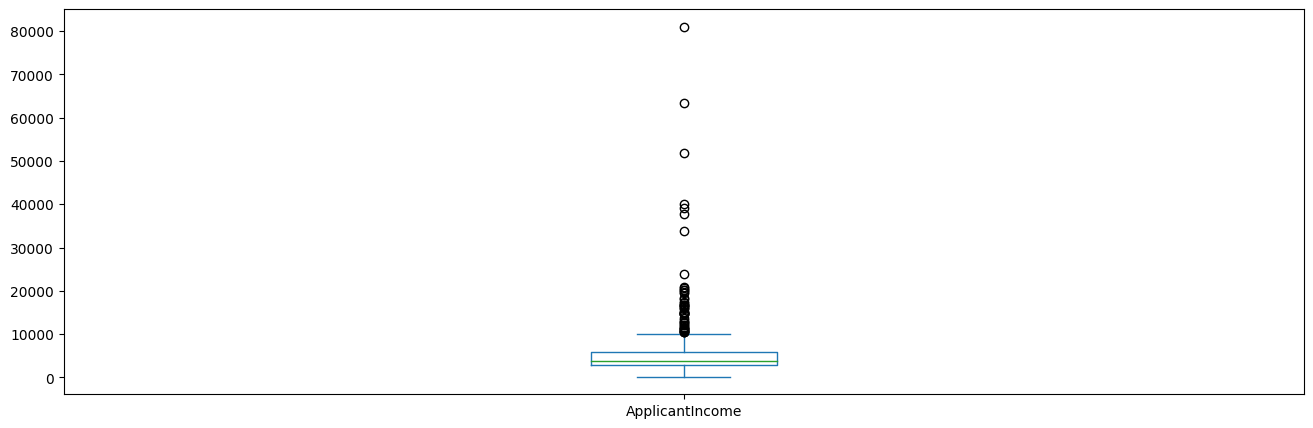

In [95]:
sns.distplot(train_df['ApplicantIncome'])
plt.show()
train_df['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different eduation levels. Let us segregate them by **Education**.

Text(0.5, 0.98, '')

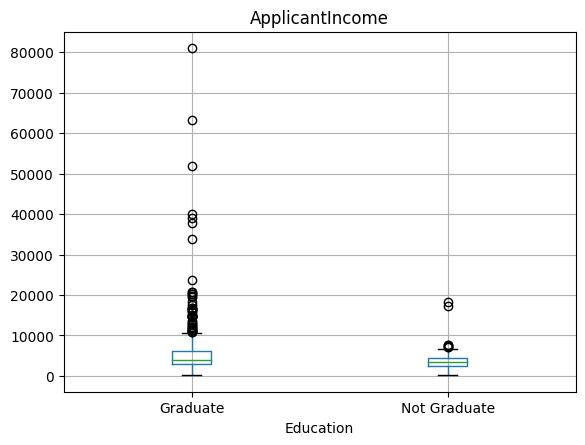

In [96]:
train_df.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be outliers.

Let's look at the Coapplicant income distribution

<ipython-input-97-6fea7dd2dd34>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['CoapplicantIncome'])


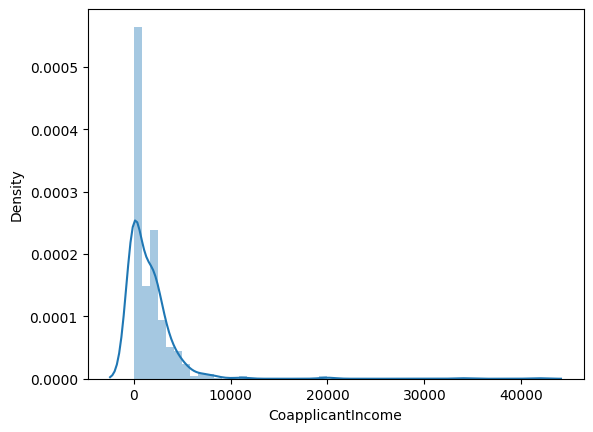

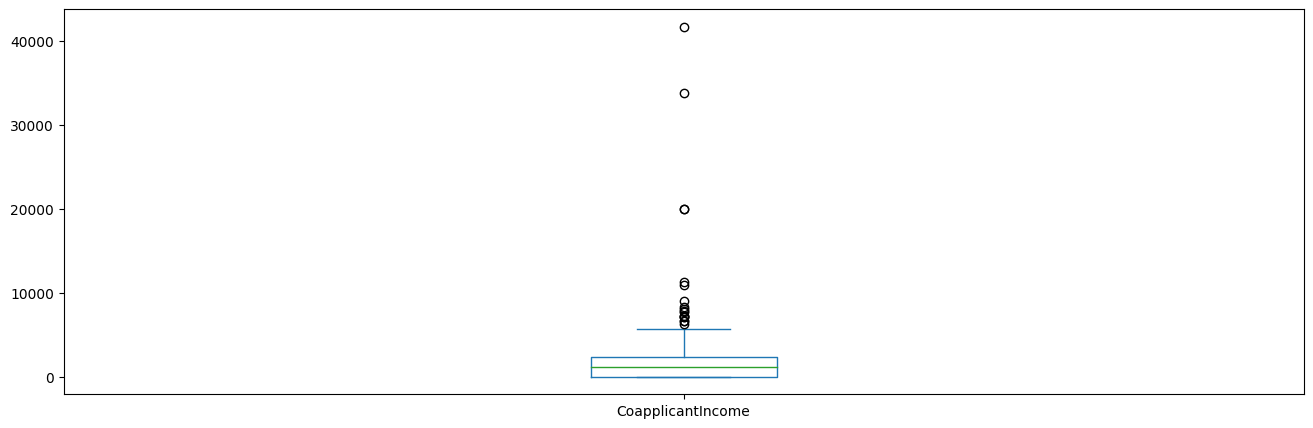

In [97]:
sns.distplot(train_df['CoapplicantIncome'])
plt.show()
train_df['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

We see a similar distribution as that of the applicant's income. The majority of co-applicants income ranges from 0 to 5000. We also see a lot of outliers in the applicant's income and it is not normally distributed.

<ipython-input-98-21aafc7a7006>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['LoanAmount'])


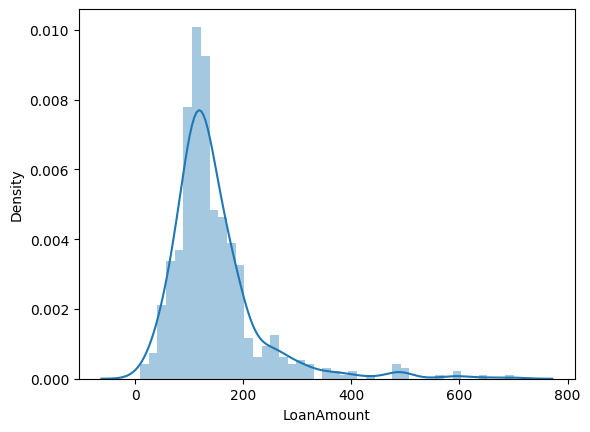

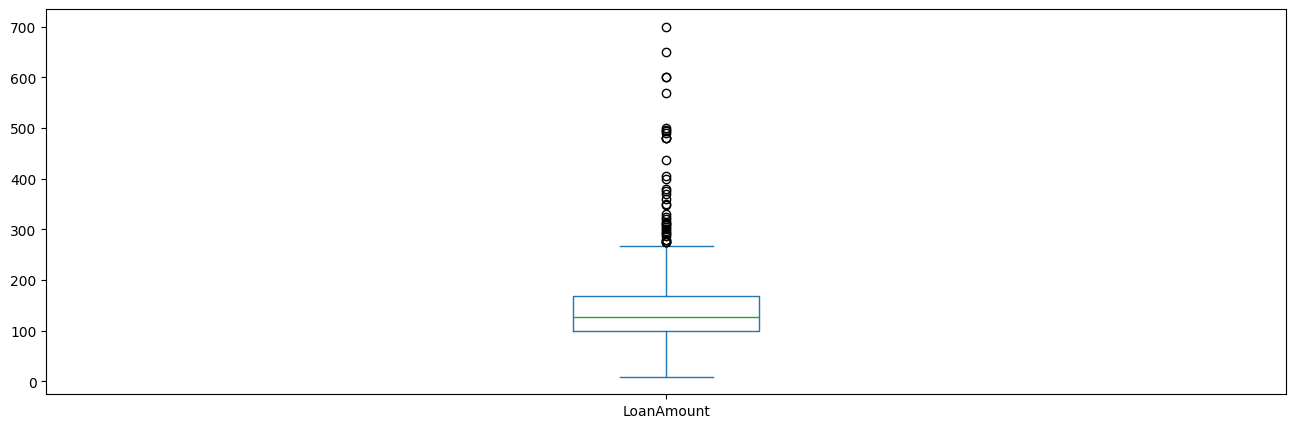

In [98]:
sns.distplot(train_df['LoanAmount'])
plt.show()
train_df['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

### Bivariate Analysis

Let's recall some of the hypotheses that we generated earlier:

* Applicants with high incomes should have more chances of loan approval.
* Applicants who have repaid their previous debts should have higher chances of loan approval.
* Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.
* Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.

Let's try to test the above-mentioned hypotheses using bivariate analysis

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

### Categorical Independent Variable and Target Variable

First of all, we will find the relation between the target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

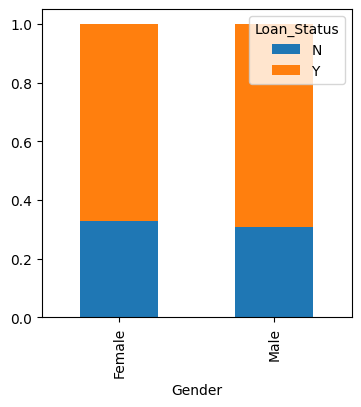

In [99]:
Gender=pd.crosstab(train_df['Gender'],train_df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.

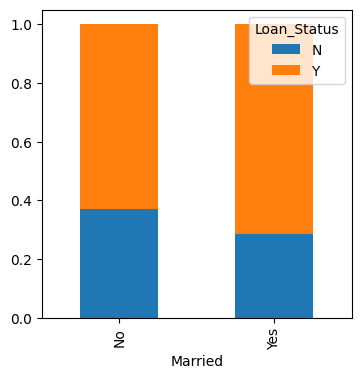

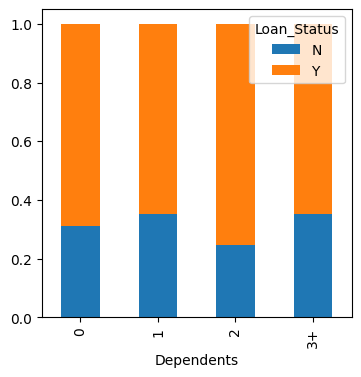

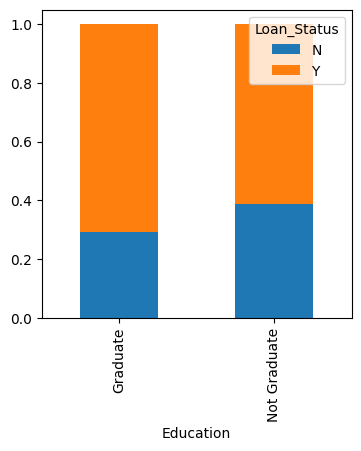

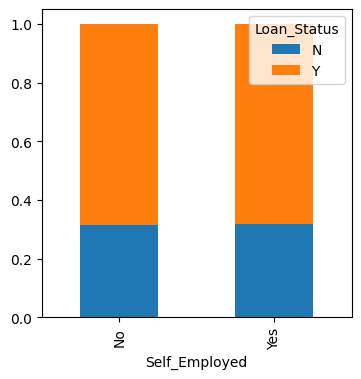

In [100]:
Married=pd.crosstab(train_df['Married'],train_df['Loan_Status'])
Dependents=pd.crosstab(train_df['Dependents'],train_df['Loan_Status'])
Education=pd.crosstab(train_df['Education'],train_df['Loan_Status'])
Self_Employed=pd.crosstab(train_df['Self_Employed'],train_df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

* The proportion of married appliants is higher for approved loans.
* Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
* There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

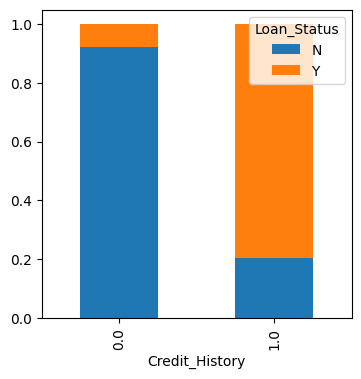

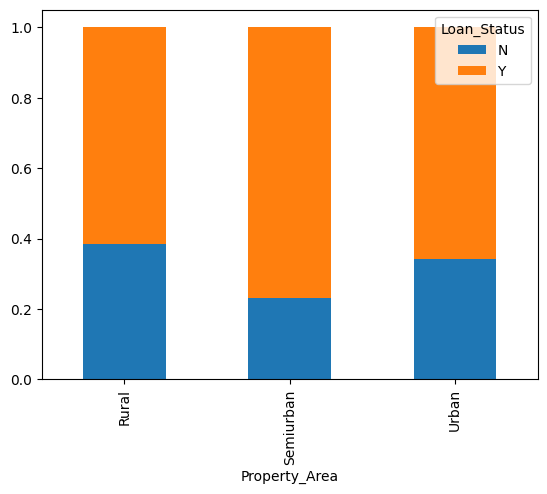

In [101]:
Credit_History=pd.crosstab(train_df['Credit_History'],train_df['Loan_Status'])
Property_Area=pd.crosstab(train_df['Property_Area'],train_df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

* It seems people with a credit history as 1 are more likely to get their loans approved.*
* The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.


### Numerical Variable vs Target Variable

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

Text(0, 0.5, ' the mean applicant income')

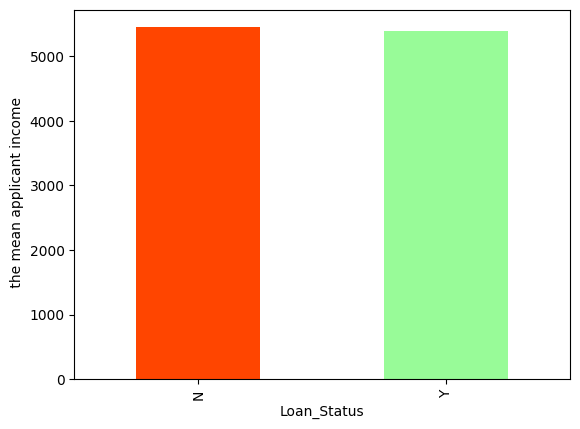

In [102]:
colors=['orangered','palegreen']
train_df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(color=colors)
plt.ylabel(' the mean applicant income')

NO change remarked in the mean income. So, let's make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

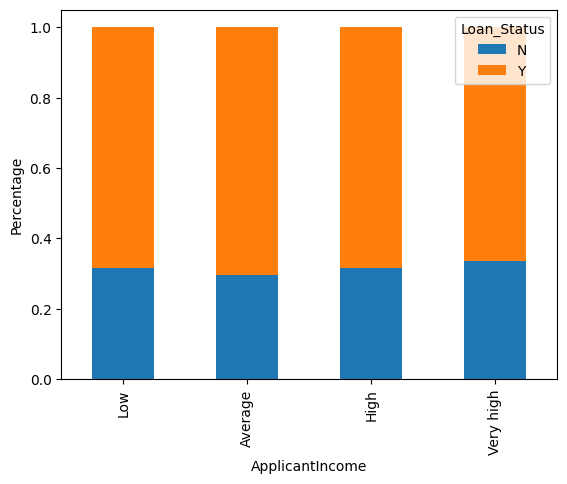

In [103]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train_df['Income_bin']=pd.cut(train_df['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train_df['Income_bin'],train_df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the coapplicant income and loan amount variable in similar manner.

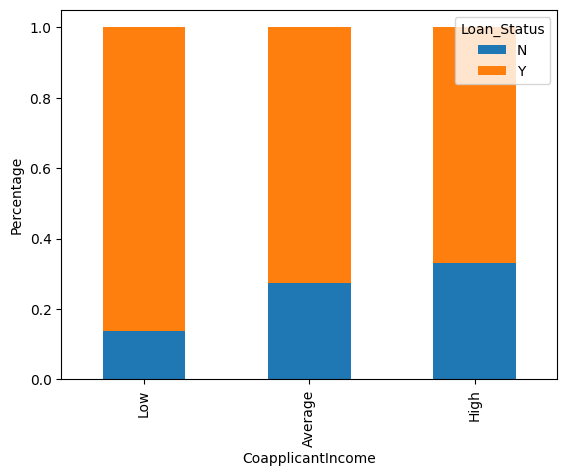

In [104]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train_df['Coapplicant_Income_bin']=pd.cut(train_df['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train_df['Coapplicant_Income_bin'],train_df['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

It shows that if co-applicants income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don't have any co-applicant so the co-applicant income for such applicants is 0 and hence the loan approval is not dependent on it. So, we can make a new variable in which we will combine the applicant's and co-applicants income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

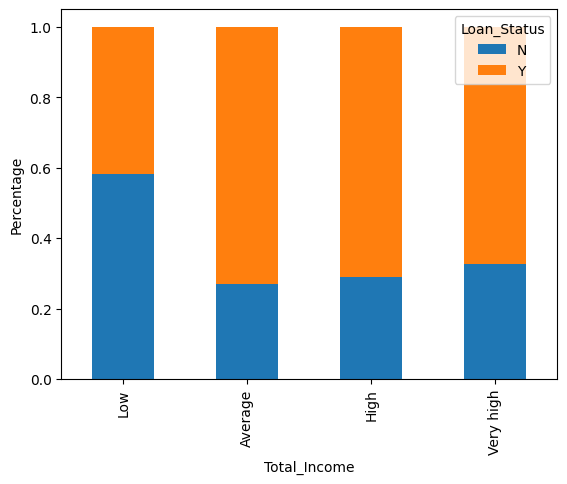

In [105]:
train_df['Total_Income']=train_df['ApplicantIncome']+train_df['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train_df['Total_Income_bin']=pd.cut(train_df['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train_df['Total_Income_bin'],train_df['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

As a remark ,We can see that Proportion of loans getting approved for applicants having low Total_Income is very less compared to that of applicants with Average, High & Very High Income.

Let's visualize the Loan Amount variable.

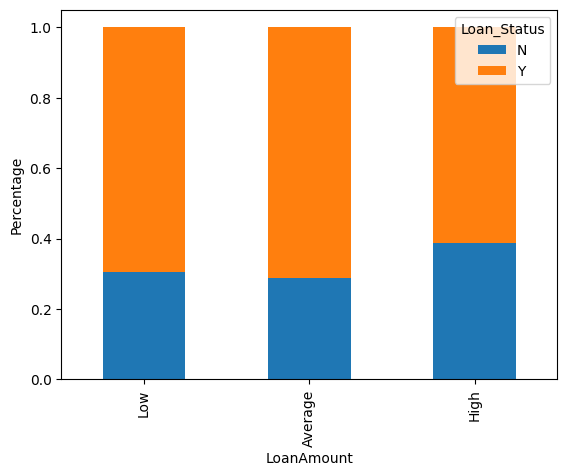

In [106]:
bins=[0,100,200,700]
group=['Low','Average','High']
train_df['LoanAmount_bin']=pd.cut(train_df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train_df['LoanAmount_bin'],train_df['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [107]:
# print(train.dtypes)
train_df=train_df.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train_df['Dependents'].replace('3+', 3,inplace=True)
test_df['Dependents'].replace('3+', 3,inplace=True)
train_df['Loan_Status'].replace('N', 0,inplace=True)
train_df['Loan_Status'].replace('Y', 1,inplace=True)

<ipython-input-107-f02224d21ade>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Dependents'].replace('3+', 3,inplace=True)
<ipython-input-107-f02224d21ade>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

Now let's look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

<Axes: >

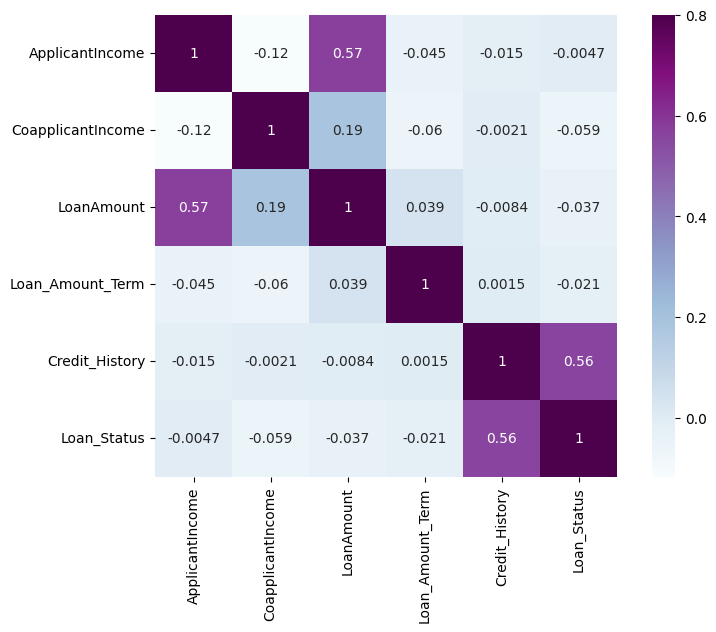

In [108]:
# Calculate correlations only for numerical features
matrix = train_df.select_dtypes(include=np.number).corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

We see that the most correlate variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

### Missing values 🚫

In [109]:
train_df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [110]:
test_df.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


There are many ways data can end up with missing values. For example:

* in the 'Gender' column, there might be 13 missing values, which could be due to some applicants not providing their gender information or errors in recording the data during the application process.

* the 'Self_Employed' column has 32 missing values, which could mean that those applicants did not indicate whether they were self-employed or not.

*  the 'Dependents' column has 15 missing values, which could be due to some applicants not having any dependents or not providing the number of dependents they have.


Most machine learning libraries (including scikit-learn) give an error if you try to build a model using data with missing values. As you can see we have some missing data, let's have a look how many we have for each column:

* by numbers
* by %

This analysis will also compare to the test and train datasets for evaluation.

In [111]:
#missing values in decsending order
print("Train:\n")
print(train_df.isnull().sum().sort_values(ascending=False),"\n\n",train_df.isnull().sum()/train_df.shape[0] *100,"\n\n")
print("Test:\n")
print(test_df.isnull().sum().sort_values(ascending=False),"\n\n",test_df.isnull().sum()/test_df.shape[0] *100,"\n\n")

Train:

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64 

 Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64 


Test:

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Loan_ID               0
Married               0
Education             0
ApplicantIncome       0
Coapplica

We can see the % of each missing Values per columns is different!

### Let's check the value counts for Train dataset :

In [112]:
print("Credit_History:\n", train_df.Credit_History.value_counts(), "\n\n")
print("Self_Employed:\n", train_df.Self_Employed.value_counts(), "\n\n")
print("LoanAmount:\n", train_df.LoanAmount.value_counts(), "\n\n")
print("Dependents:\n", train_df.Dependents.value_counts(), "\n\n")
print("Loan_Amount_Term:\n", train_df.Loan_Amount_Term.value_counts(), "\n\n")
print("Gender:\n", train_df.Gender.value_counts(), "\n\n")
print("Married:\n", train_df.Married.value_counts(), "\n\n")



Credit_History:
 Credit_History
1.0    475
0.0     89
Name: count, dtype: int64 


Self_Employed:
 Self_Employed
No     500
Yes     82
Name: count, dtype: int64 


LoanAmount:
 LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64 


Dependents:
 Dependents
0    345
1    102
2    101
3     51
Name: count, dtype: int64 


Loan_Amount_Term:
 Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64 


Gender:
 Gender
Male      489
Female    112
Name: count, dtype: int64 


Married:
 Married
Yes    398
No     213
Name: count, dtype: int64 




------------------------------------------------------------------------------------------------------------------------------
Credit_History,Self_Employed,Dependents,Gender,Married are categorical columns, therefore we will impute missing values with Medium the **mode** value

In [113]:
print('train_df : mode : ',train_df['Credit_History'].mode().values[0])
print('train_df : mode : ',train_df['Self_Employed'].mode().values[0])
print('train_df : mode : ',train_df['Dependents'].mode().values[0])
print('train_df : mode : ',train_df['Gender'].mode().values[0])
print('train_df : mode : ',train_df['Married'].mode().values[0])


train_df : mode :  1.0
train_df : mode :  No
train_df : mode :  0
train_df : mode :  Male
train_df : mode :  Yes


In [114]:
# filling the missing values

train_df['Credit_History'] = train_df['Credit_History'].fillna(train_df['Credit_History'].dropna().mode().values[0])
train_df['Self_Employed'] = train_df['Self_Employed'].fillna(train_df['Self_Employed'].dropna().mode().values[0])
train_df['Dependents'] = train_df['Dependents'].fillna(train_df['Dependents'].dropna().mode().values[0])
train_df['Gender'] = train_df['Gender'].fillna(train_df['Gender'].dropna().mode().values[0])
train_df['Married'] = train_df['Married'].fillna(train_df['Married'].dropna().mode().values[0])

#checking if we filled missing values
train_df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'LoanAmount Boxplot')

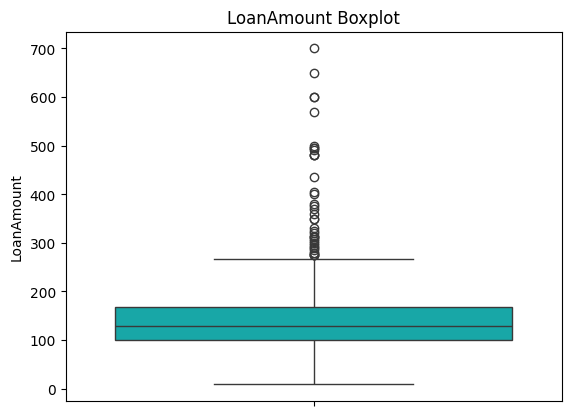

In [115]:
sns.boxplot(data=train_df['LoanAmount'],orient="v", color = 'c')
plt.title("LoanAmount Boxplot")

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [116]:
train_df['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
240.0,4
84.0,4
120.0,3
60.0,2
36.0,2


In [117]:
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)

<ipython-input-117-14d61e2320f3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)


In [118]:
train_df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,0


For the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use the median to fill the null values as earlier we saw that the loan amount has outliers so the mean will not be the proper approach as it is highly affected by the presence of outlier

In [119]:
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)

<ipython-input-119-f157cd043e30>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)


In [120]:
train_df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


With the same approach , we can handle the missing values in the test_df

In [121]:
test_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
test_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
test_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
test_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)
test_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)
test_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)
test_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)

<ipython-input-121-909aab98662e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
<ipython-input-121-909aab98662e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

Checking for possible missing values

In [122]:
test_df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


### Outlier Treatment

It can be seen that having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets. Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution. Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.

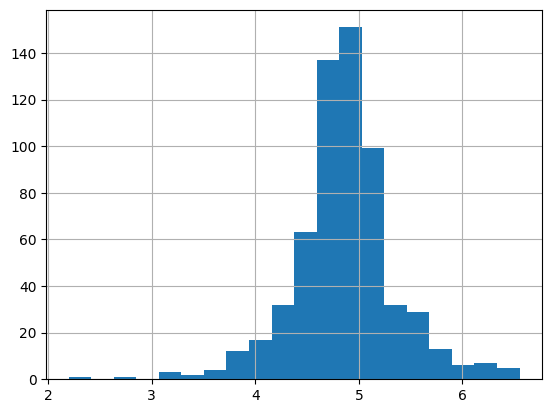

In [123]:
train_df['LoanAmount_log']=np.log(train_df['LoanAmount'])
train_df['LoanAmount_log'].hist(bins=20)
test_df['LoanAmount_log']=np.log(test_df['LoanAmount'])

The distribution looks much closer to normal and effect of extreme values has been significantly subsided.

### Model Building and training

Lets drop the Loan_ID variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [124]:
train_df=train_df.drop('Loan_ID',axis=1)
test_df=test_df.drop('Loan_ID',axis=1)


In [125]:
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,4.262680
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,3.688879
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,5.533389
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,5.231109


Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

In [126]:
X = train_df.drop('Loan_Status',axis=1)
y = train_df.Loan_Status

Next is  making dummy variables for the categorical variables.
Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare

In [127]:
X = pd.get_dummies(X)
train=pd.get_dummies(train_df)
test=pd.get_dummies(test_df)

Now we will train the model on training dataset and make predictions for the test dataset.
But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

We will use the train_test_split function from sklearn to divide our train dataset.First let us import train_test_split.

In [128]:
#train validation test sets

X_train, X_, y_train, y_ = train_test_split(X,y, test_size=0.3)
X_v, X_test, y_v, y_test = train_test_split(X_,y_,test_size=0.5)

In [129]:
X_train, y_train

(     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
 601             2894             2792.0       155.0             360.0   
 431             6500                0.0       105.0             360.0   
 186             2178                0.0        66.0             300.0   
 245             6050             4333.0       120.0             180.0   
 565             4467                0.0       120.0             360.0   
 ..               ...                ...         ...               ...   
 505             3510             4416.0       243.0             360.0   
 219             4283             2383.0       127.0             360.0   
 205             4408                0.0       120.0             360.0   
 417             1600            20000.0       239.0             360.0   
 577             3229             2739.0       110.0             360.0   
 
      Credit_History  LoanAmount_log  Gender_Female  Gender_Male  Married_No  \
 601             1.0        5.

Since the dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [150]:

#model  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l1')
#model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l1', solver='liblinear')

#LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l1')
# Baseline Model
LGR_model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                           intercept_scaling=1, max_iter=1000, multi_class='ovr',
                           n_jobs=1, penalty='l2', solver='liblinear')

RF_model = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=5, n_jobs=-1)
GBM = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=42)

Models = {"LogisticRegression":LGR_model,
          "RandomForestClassifier":RF_model,
          "GradientBoostingClassifier": GBM}

for model in Models.values():
    model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [131]:
for name, model in Models.items() :
  # validation
  pred_v = model.predict(X_v)


  print(f"Model evaluation on  validation set\n:-----{name}-----")
  print(f"\n----- {classification_report(y_v, pred_v)}-----")


Model evaluation on  validation set
:-----LogisticRegression-----

-----               precision    recall  f1-score   support

           0       1.00      0.59      0.74        22
           1       0.89      1.00      0.94        70

    accuracy                           0.90        92
   macro avg       0.94      0.80      0.84        92
weighted avg       0.91      0.90      0.89        92
-----
Model evaluation on  validation set
:-----RandomForestClassifier-----

-----               precision    recall  f1-score   support

           0       0.78      0.64      0.70        22
           1       0.89      0.94      0.92        70

    accuracy                           0.87        92
   macro avg       0.83      0.79      0.81        92
weighted avg       0.86      0.87      0.86        92
-----
Model evaluation on  validation set
:-----GradientBoostingClassifier-----

-----               precision    recall  f1-score   support

           0       1.00      0.55      0.71       

So our predictions are almost 79% accurate, i.e. we have identified 79% of the loan status correctly.

Let’s make predictions for the test dataset.

In [132]:
for name, model in Models.items() :
  # validation
  test_pred = model.predict(X_test)


  print(f"Model evaluation on  test set\n:-----{name}-----")
  print(f"\n----- {classification_report(test_pred, y_test)}-----")


Model evaluation on  test set
:-----LogisticRegression-----

-----               precision    recall  f1-score   support

           0       0.44      1.00      0.61        11
           1       1.00      0.83      0.91        82

    accuracy                           0.85        93
   macro avg       0.72      0.91      0.76        93
weighted avg       0.93      0.85      0.87        93
-----
Model evaluation on  test set
:-----RandomForestClassifier-----

-----               precision    recall  f1-score   support

           0       0.48      0.71      0.57        17
           1       0.93      0.83      0.88        76

    accuracy                           0.81        93
   macro avg       0.70      0.77      0.72        93
weighted avg       0.84      0.81      0.82        93
-----
Model evaluation on  test set
:-----GradientBoostingClassifier-----

-----               precision    recall  f1-score   support

           0       0.48      0.86      0.62        14
           1  

### Logistic Regression using stratified k-folds cross validation

In [133]:
from sklearn.model_selection import StratifiedKFold

In [134]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for model in Models.values():
  lst_accu_stratified = []

  for train_index, test_index in skf.split(X,y):
      x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
      y_train_fold, y_test_fold = y[train_index], y[test_index]
      model.fit(x_train_fold, y_train_fold)
      lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))

      # Print the output.
  print('List of possible accuracy:', lst_accu_stratified)
  print('\nMaximum Accuracy That can be obtained from this model is:',
  max(lst_accu_stratified)*100, '%')
  joblib.dump(model,f'model_{lst_accu_stratified.index(max(lst_accu_stratified))}')

  print('\nMinimum Accuracy:',
        min(lst_accu_stratified)*100, '%')
  print('\nOverall Accuracy:',
        mean(lst_accu_stratified)*100, '%')
  print('\nStandard Deviation is:', stdev(lst_accu_stratified))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

List of possible accuracy: [0.8225806451612904, 0.8225806451612904, 0.8225806451612904, 0.7903225806451613, 0.819672131147541, 0.819672131147541, 0.8032786885245902, 0.7540983606557377, 0.819672131147541, 0.8360655737704918]

Maximum Accuracy That can be obtained from this model is: 83.60655737704919 %

Minimum Accuracy: 75.40983606557377 %

Overall Accuracy: 81.10523532522475 %

Standard Deviation is: 0.023525820483814578
List of possible accuracy: [0.8225806451612904, 0.7903225806451613, 0.8064516129032258, 0.7741935483870968, 0.8032786885245902, 0.819672131147541, 0.7213114754098361, 0.7540983606557377, 0.7704918032786885, 0.8032786885245902]

Maximum Accuracy That can be obtained from this model is: 82.25806451612904 %

Minimum Accuracy: 72.1311475409836 %

Overall Accuracy: 78.65679534637758 %

Standard Deviation is: 0.031771765776198495
List of possible accuracy: [0.8064516129032258, 0.7741935483870968, 0.8225806451612904, 0.7419354838709677, 0.8032786885245902, 0.754098360655737

### Feature Engineering
Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

*  Total Income :  Considering the insights gained from the bivariate analysis, we will consolidate the Applicant Income and Coapplicant Income into a single feature called Total Income. This consolidation is based on the notion that a higher total income could potentially correlate with an increased likelihood of loan approval.

*  EMI  :  EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

* Balance Income : This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

### New features added

In [135]:
train_df['Total_Income']=train_df['ApplicantIncome']+train_df['CoapplicantIncome']
test_df['Total_Income']=test_df['ApplicantIncome']+test_df['CoapplicantIncome']

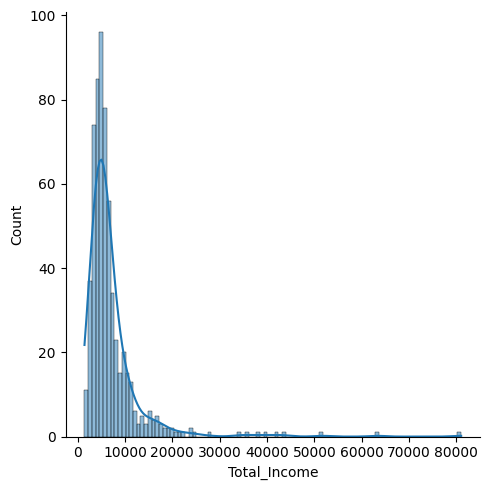

In [136]:
sns.displot(data=train_df, x='Total_Income', kde=True)

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

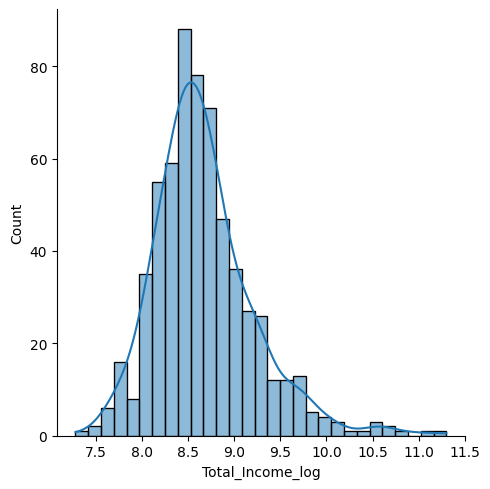

In [137]:
train_df['Total_Income_log'] = np.log(train_df['Total_Income'])
sns.displot(data=train_df, x='Total_Income_log', kde=True)
plt.show()
test_df['Total_Income_log'] = np.log(test_df['Total_Income'])

Now that the distribution looks much closer to normal and the effect of extreme values has been significantly subsided. We will be creating the EMI feature now.

In [138]:
train_df['EMI']=train_df['LoanAmount']/train_df['Loan_Amount_Term']
test_df['EMI']=test_df['LoanAmount']/test_df['Loan_Amount_Term']

##### the distribution of EMI variable.

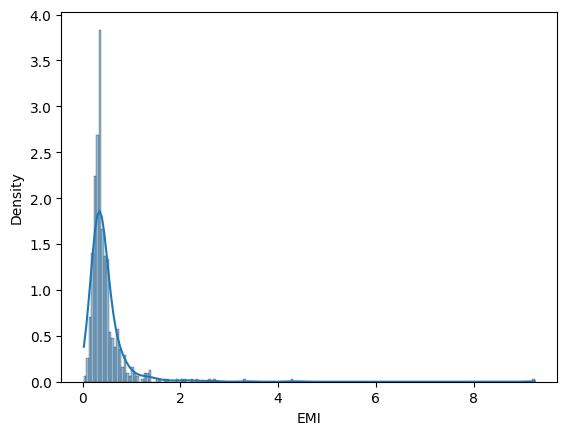

In [139]:
sns.histplot(data=train_df, x='EMI', kde=True, stat='density')
plt.show()


Now the Balance Income feature  and check its distribution.

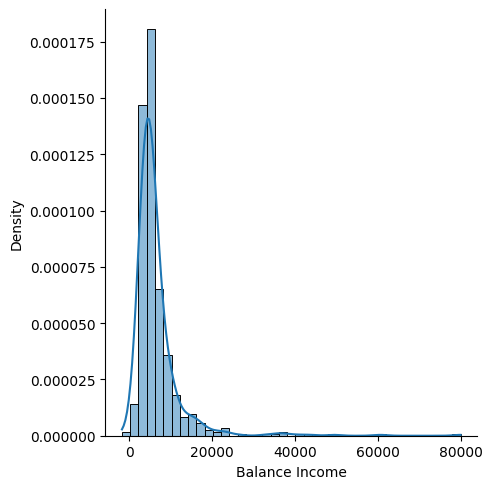

In [140]:
train_df['Balance Income'] = train_df['Total_Income']-(train_df['EMI']*1000)
test_df['Balance Income'] = test_df['Total_Income']-(test_df['EMI']*1000)
sns.displot(data=train_df, x='Balance Income', kde=True, stat='density',  binwidth=2000)
plt.show()

Now, we should exclude the variables that were employed in generating these novel features. The rationale behind this action is that there is expected to be a substantial correlation between these previous attributes and the recently constructed features. In the context of logistic regression, it's assumed that the variables exhibit minimal correlation. Furthermore, we aim to enhance the dataset's signal-to-noise ratio, and by eliminating correlated attributes, we can effectively diminish the presence of noise.

In [141]:
 #print (train_df.dtypes)
# print (test_df.dtypes)
train_df=train_df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test_df=test_df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [142]:
test_df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,Total_Income,Total_Income_log,EMI,Balance Income
0,Male,Yes,0,Graduate,No,1.0,Urban,4.700480,5720,8.651724,0.305556,5414.444444
1,Male,Yes,1,Graduate,No,1.0,Urban,4.836282,4576,8.428581,0.350000,4226.000000
2,Male,Yes,2,Graduate,No,1.0,Urban,5.337538,6800,8.824678,0.577778,6222.222222
3,Male,Yes,2,Graduate,No,1.0,Urban,4.605170,4886,8.494129,0.277778,4608.222222
4,Male,No,0,Not Graduate,No,1.0,Urban,4.356709,3276,8.094378,0.216667,3059.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3,Not Graduate,Yes,1.0,Urban,4.727388,5786,8.663196,0.313889,5472.111111
363,Male,Yes,0,Graduate,No,1.0,Urban,4.744932,4867,8.490233,0.319444,4547.555556
364,Male,No,0,Graduate,No,1.0,Semiurban,4.836282,5243,8.564649,0.350000,4893.000000
365,Male,Yes,0,Graduate,No,1.0,Rural,5.062595,7393,8.908289,0.438889,6954.111111


### Model Building : Model optimisation

With addding new features ,we willcontinue the model building process. So we will start with logistic regression model and then move over to more complex models like RandomForest .

first,let's our input data for the model


In [143]:
X = train_df.drop('Loan_Status',axis=1)
y = train_df.Loan_Status

In [144]:
X = pd.get_dummies(X)

test=pd.get_dummies(test_df)
test

,Credit_History,LoanAmount_log,Total_Income,Total_Income_log,EMI,Balance Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.700480,5720,8.651724,0.305556,5414.444444,False,True,False,True,...,True,False,False,True,False,True,False,False,False,True
1,1.0,4.836282,4576,8.428581,0.350000,4226.000000,False,True,False,True,...,False,True,False,True,False,True,False,False,False,True
2,1.0,5.337538,6800,8.824678,0.577778,6222.222222,False,True,False,True,...,False,False,True,True,False,True,False,False,False,True
3,1.0,4.605170,4886,8.494129,0.277778,4608.222222,False,True,False,True,...,False,False,True,True,False,True,False,False,False,True
4,1.0,4.356709,3276,8.094378,0.216667,3059.333333,False,True,True,False,...,True,False,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,4.727388,5786,8.663196,0.313889,5472.111111,False,True,False,True,...,False,False,False,False,True,False,True,False,False,True
363,1.0,4.744932,4867,8.490233,0.319444,4547.555556,False,True,False,True,...,True,False,False,True,False,True,False,False,False,True
364,1.0,4.836282,5243,8.564649,0.350000,4893.000000,False,True,True,False,...,True,False,False,True,False,True,False,False,True,False
365,1.0,5.062595,7393,8.908289,0.438889,6954.111111,False,True,False,True,...,True,False,False,True,False,True,False,True,False,False


In [145]:
# scaling only numerical values
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X)
test = sc.transform(test)

###  Training

In [146]:
for model in Models.values():
  lst_accu_stratified = []


  for train_index, test_index in skf.split(X,y):
      x_train_fold, x_test_fold = X[train_index], X[test_index]
      y_train_fold, y_test_fold = y[train_index], y[test_index]
      model.fit(x_train_fold, y_train_fold)
      lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))
      # Print the output.
  print('List of possible accuracy:', lst_accu_stratified)
  print('\nMaximum Accuracy That can be obtained from this model is:',
        max(lst_accu_stratified)*100, '%')
  print('\nMinimum Accuracy:',
        min(lst_accu_stratified)*100, '%')
  print('\nOverall Accuracy:',
        mean(lst_accu_stratified)*100, '%')
  print('\nStandard Deviation is:', stdev(lst_accu_stratified))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

List of possible accuracy: [0.8064516129032258, 0.8225806451612904, 0.8225806451612904, 0.7903225806451613, 0.819672131147541, 0.8032786885245902, 0.7868852459016393, 0.7377049180327869, 0.8032786885245902, 0.8360655737704918]

Maximum Accuracy That can be obtained from this model is: 83.60655737704919 %

Minimum Accuracy: 73.77049180327869 %

Overall Accuracy: 80.28820729772607 %

Standard Deviation is: 0.027555752261522837
List of possible accuracy: [0.7419354838709677, 0.7741935483870968, 0.8387096774193549, 0.7741935483870968, 0.819672131147541, 0.8032786885245902, 0.7868852459016393, 0.7704918032786885, 0.7540983606557377, 0.7868852459016393]

Maximum Accuracy That can be obtained from this model is: 83.87096774193549 %

Minimum Accuracy: 74.19354838709677 %

Overall Accuracy: 78.50343733474352 %

Standard Deviation is: 0.029214919131138075
List of possible accuracy: [0.7741935483870968, 0.8064516129032258, 0.8064516129032258, 0.7741935483870968, 0.7704918032786885, 0.786885245901

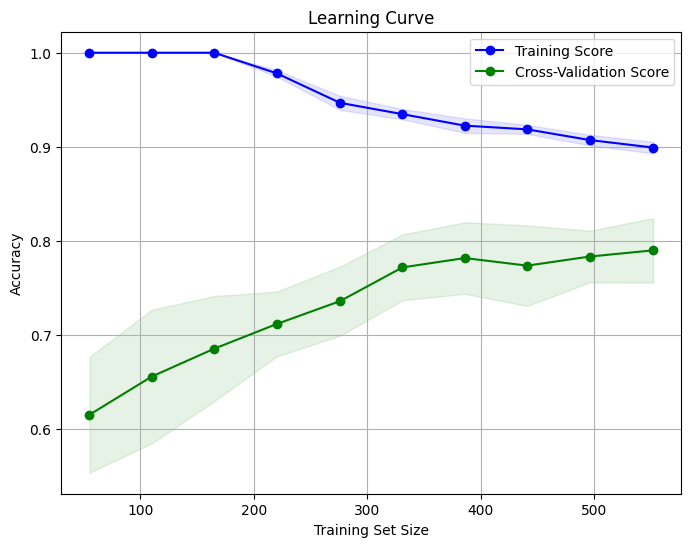

In [152]:
# Learning Curves :
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(RF_model, X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Function to plot learning curve
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=10,
                                                            train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

    # Calculate the mean and std for training and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label="Training Score")
    plt.plot(train_sizes, test_mean, 'o-', color='green', label="Cross-Validation Score")

    # Fill in between the standard deviations
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)

    # Labels and title
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Use the RandomForestClassifier to plot the learning curve
plot_learning_curve(model, X, y)